
#  **Поиск, сортировка и комплексный Анализ**

Алгоритмы являются одним из основных строительных блоков компьютерных программ. (Другой,
структуры данных, будет рассмотрен в главе 4 “Массивы и связанные структуры”.)
Алгоритм описывает вычислительный процесс, который останавливается при решении задачи.
Существует множество критериев для оценки качества алгоритма. Наиболее важным критерием является корректность, а именно то, что алгоритм фактически решает проблему
, для решения которой он предназначен. Читаемость и простота обслуживания также являются важными качествами. В этой
главе рассматривается еще один важный критерий качества алгоритмов — время выполнения
представление.

## **Измерение времени выполнения алгоритма**

Один из способов измерить временные затраты алгоритма - использовать часы компьютера для получения
фактического времени выполнения. Этот процесс, называемый сравнительным анализом или профилированием, начинается с определения времени для нескольких различных наборов данных одинакового размера, а затем вычисляется среднее время. Затем аналогичные данные собираются для все больших и больших наборов данных. После нескольких таких тестов
доступно достаточно данных, чтобы предсказать, как поведет себя алгоритм для набора данных любого размера.

Рассмотрим простой, хотя и нереалистичный пример. Следующая программа реализует алгоритм
, который считает от 1 до заданного числа. Таким образом, размер задачи равен числу. Вы начинаете с
числа 10 000 000, вычисляете время работы алгоритма и выводите время выполнения в окно терминала
. Затем вы удваиваете размер этого числа и повторяете этот процесс. После пяти таких
увеличений появляется набор результатов, из которых вы можете сделать обобщение. Вот код для программы
тестирования:

In [1]:
"""
File: timing1.py
Prints the running times for problem sizes that double,
using a single loop.
"""
import time

problemSize = 10000000
print("%12s%16s" % ("Problem Size", "Seconds"))
for count in range(5):
    start = time.time()
    # The start of the algorithm
    work = 1
    for x in range(problemSize):
        work += 1
        work -= 1
    # The end of the algorithm
    elapsed = time.time() - start
    print("%12d%16.3f" % (problemSize, elapsed))
    problemSize *= 2

Problem Size         Seconds
    10000000           1.892
    20000000           4.624
    40000000           7.225
    80000000          15.897
   160000000          28.140


Программа тестирования использует функцию time() в модуле time для отслеживания времени выполнения.
Эта функция возвращает количество секунд, прошедших между текущим временем
на часах компьютера и 1 января 1970 года (также называемое Эпохой). Таким образом, разница
между результатами двух вызовов time.time() представляет собой прошедшее время в секундах. Обратите
также внимание, что программа выполняет постоянный объем работы в виде двух расширенных инструкций присваивания при каждом прохождении цикла. Хотя эта работа не завершается
во многом это отнимает достаточно времени на каждой итерации, так что общее время выполнения значительно, но не оказывает никакого другого влияния на результаты. На рисунке 3-1 показаны выходные данные программы.

## **Инструкции по подсчету**

Другой метод, используемый для оценки эффективности алгоритма, заключается в подсчете инструкций, выполняемых с различными размерами задач. Эти подсчеты обеспечивают хороший показатель
объема абстрактной работы, выполняемой алгоритмом, независимо от того, на какой платформе алгоритм
запущен. Однако имейте в виду, что когда вы подсчитываете инструкции, вы подсчитываете
инструкции в коде высокого уровня, в котором написан алгоритм, а не инструкции в
исполняемой программе на машинном языке.

При анализе алгоритма таким образом вы проводите различие между двумя классами
инструкций:

*   Инструкции, которые выполняются одинаковое количество раз независимо от размера проблемы
*   Инструкции, количество выполнений которых зависит от размера задачи



На данный момент вы игнорируете инструкции в первом классе, потому что они не играют существенной
роли в такого рода анализе. Инструкции во втором классе обычно находятся в циклах или
рекурсивных функциях. В случае циклов вы также обнуляете инструкции, выполняемые в любых
вложенных циклах, или, проще говоря, просто количество итераций, выполняемых вложенным циклом.
Например, попробуйте подключить предыдущую программу для отслеживания и отображения количества итераций
, выполняемых внутренним циклом с различными наборами данных:

In [3]:
"""
File: counting.py
Prints the number of iterations for problem sizes
that double, using a nested loop.
"""

problemSize = 1000
print("%12s%15s" % ("Problem Size", "Iterations"))
for count in range(5):
    number = 0
    # The start of the algorithm
    work = 1
    for j in range(problemSize):
        for k in range(problemSize):
            number += 1
            work += 1
            work -= 1
    # The end of the algorithm
    print("%12d%15d" % (problemSize, number))
    problemSize *= 2

Problem Size     Iterations
        1000        1000000
        2000        4000000
        4000       16000000
        8000       64000000
       16000      256000000


Вот аналогичная программа, которая отслеживает количество вызовов рекурсивной функции Фибоначчи
для нескольких размеров задачи. Обратите внимание, что функция теперь ожидает второй аргумент, который является
объектом счетчика. Каждый раз, когда функция вызывается на верхнем уровне, создается и передается ей новый объект счетчика (как
определено в главе 1 “Основы программирования на Python”). При этом вызове
и каждом рекурсивном вызове объект счетчика функции увеличивается.

In [6]:
class Counter(object):
    """Models a counter."""

    # Class variable
    instances = 0
    _value = instances

    # Constructor
    def __init__(self):
        """Sets up the counter."""
        Counter.instances += 1
        self.reset()

    # Mutator methods
    def reset(self):
        """Sets the counter to 0."""
        self.value = 0

    def increment(self, amount = 1):
        """Adds amount to the counter."""
        self.value += amount

    def decrement(self, amount = 1):
        """Subtracts amount from the counter."""
        self.value -= amount

    # Accessor methods
    def getValue(self):
        """Returns the counter's value."""
        return self.value

    def __str__(self):
        """Returns the string representation of the counter."""
        return str(self._value)

    def __eq__(self, other):
        """Returns True if self equals other
        or False otherwise."""
        if self is other: return True
        if type(self) != type(other): return False
        return self.value == other.value

In [12]:
"""
File: countfib.py
Prints the number of calls of a recursive Fibonacci
function with problem sizes that double.
"""

# from counter import Counter

def fib(n, counter):
    """Count the number of calls of the Fibonacci function."""

    counter.increment()
    if n < 3:
        return 1
    else:
        return fib(n - 1, counter) + fib(n - 2, counter)

problemSize = 2
print("%12s%15s" % ("Problem Size", "Calls"))
for count in range(5):
    counter = Counter()
    # The start of the algorithm
    fib(problemSize, counter)
    # The end of the algorithm
    print("%12d%15s" % (problemSize, counter.instances))
    problemSize *= 2

Problem Size          Calls
           2              6
           4              7
           8              8
          16              9
          32             10


## **Измерение объема памяти, используемой алгоритмом**

Полный анализ ресурсов, используемых алгоритмом, включает
в себя требуемый объем памяти. Еще раз сосредоточьтесь на темпах потенциального роста. Некоторым алгоритмам требуется одинаковый
объем памяти для решения любой задачи. Другим алгоритмам требуется больше памяти по
мере увеличения размера задачи. В последующих главах рассматриваются некоторые из этих алгоритмов.

## **Анализ сложности**

В этом разделе вы разрабатываете метод определения эффективности алгоритмов, который
позволяет вам оценивать их независимо от зависящих от платформы таймингов или
количества непрактичных инструкций. Этот метод, называемый анализом сложности, предполагает чтение алгоритма
и использование карандаша и бумаги для решения некоторых простых алгебраических задач.

## **Порядки сложности**

Рассмотрим два цикла подсчета, рассмотренных ранее. Первый цикл выполняется n раз
для задачи размера n. Второй цикл содержит вложенный цикл, который повторяется n2 раза.
Объем работы, выполняемой этими двумя алгоритмами, аналогичен при малых значениях n, но
сильно отличается при больших значениях n. Рисунок 3-5 и таблица 3-1 иллюстрируют это расхождение.
Обратите внимание, что “работа” в данном случае относится к числу итераций наиболее глубоко
вложенного цикла.

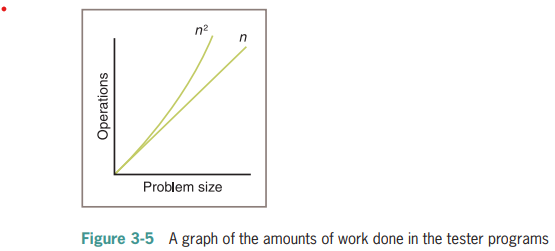

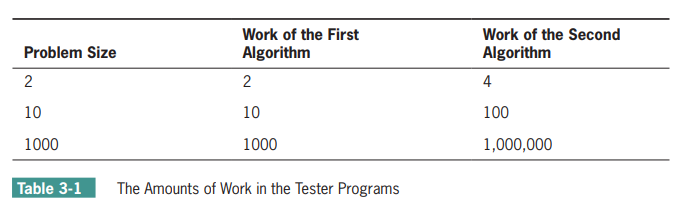

Производительность этих алгоритмов отличается на порядок сложности. Производительность
первого алгоритма линейна в том смысле, что его работа растет прямо пропорционально размеру
задачи (размер задачи 10, количество работ 10; 20 и 20; и так далее). Поведение второго
алгоритма является квадратичным в том смысле, что его работа растет как функция квадрата размера задачи
(размер задачи равен 10, работа равна 100). Как вы можете видеть из графика и таблицы, алгоритмы
с линейным поведением выполняют меньше работы, чем алгоритмы с квадратичным поведением для большинства
размеры задачи n. На самом деле, по мере увеличения размера задачи производительность алгоритма
с более высоким порядком сложности ухудшается быстрее.

При анализе алгоритмов обычно используются несколько других порядков сложности.
Алгоритм обладает постоянной производительностью, если для решения задачи любого размера требуется одинаковое количество операций
. Индексация списка является хорошим примером алгоритма с постоянным временем выполнения. Очевидно, что это
лучший вид производительности, который можно получить.

Другой порядок сложности, который лучше линейного, но хуже постоянного, называется
логарифмическим. Объем работы логарифмического алгоритма пропорционален
log2 размера задачи. Таким образом, когда размер задачи удваивается, объем работы
увеличивается только на 1 (то есть просто добавьте 1).

Работа алгоритма за полиномиальное время увеличивается со скоростью nk
, где k - константа
, большая 1. Примерами являются n2, n3 и n10.

Хотя n3 в некотором смысле хуже, чем n2, они оба имеют полиномиальный порядок и
являются лучшими, чем следующий более высокий порядок сложности. Порядок сложности
, который хуже полиномиального, называется экспоненциальным. Примерная скорость роста этого порядка равна n 2.
Экспоненциальные алгоритмы непрактичны для выполнения при больших размерах задач. Наиболее распространенные уровни сложности, используемые при анализе алгоритмов, обобщены на рисунке 3-6
и в таблице 3-2.

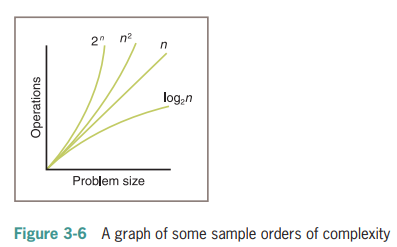

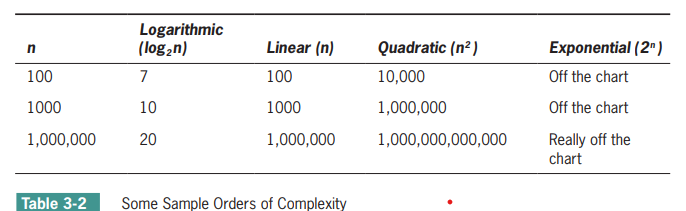

## **Big-O Notation**

Алгоритм редко выполняет количество операций, в точности равное n, n2 или nk.
Алгоритм обычно выполняет другую работу в теле цикла, над циклом и под
циклом. Например, вы могли бы точнее сказать, что алгоритм выполняет 2n 1 3
или 2n2
операции. В случае вложенного цикла внутренний цикл может выполнять на один
проход меньше после каждого прохождения через внешний цикл, так что общее количество итераций может быть больше похоже на 1
2 2 1 n n 2 2 , а не на n2. Объем работы в алгоритме обычно представляет
собой сумму нескольких членов в многочлене. Всякий раз, когда объем работы выражается в виде
многочлена, один член является доминирующим. Когда n становится большим, доминирующий член становится настолько
большим, что вы можете игнорировать объем работы, представленный другими членами. Таким образом,
например, в многочлене 1
2 2 2 1 n n2 вы фокусируетесь на квадратичном члене, 1
2 2 n, фактически
исключая из рассмотрения линейный член, ½ n. Вы также можете исключить коэффициент ½
, поскольку соотношение между 1
2 2 n и n2 не меняются при увеличении n. Например, если вы
удвоите размер задачи, время выполнения алгоритмов, равное n 1
2 2
и n2
, увеличится в 4 раза. Этот тип анализа иногда называют асимптотическим анализом, потому
что значение многочлена асимптотически приближается к значению его наибольшего
члена, когда n становится очень большим.

## **Роль константы пропорциональности**

Константа пропорциональности включает в себя термины и коэффициенты, которые обычно игнорируются
при анализе big-O. Например, работа, выполняемая алгоритмом с линейным временем, может
быть выражена как работа 52 * размер, где константа пропорциональности, в данном случае 2, равна
работа/размер. Когда эти константы велики, они могут повлиять на алгоритмы, особенно для
наборов данных малого и среднего размера. Например, никто не может игнорировать разницу между
n и n/2, когда n равно 1 000 000 долларов. В рассмотренных до сих пор примерах алгоритмов инструкции, которые выполняются в цикле, являются частью константы пропорциональности, как
и инструкции, которые инициализируют переменные перед вводом циклов. При анализе
алгоритма вы должны быть осторожны, чтобы определить, выполняет ли какая-либо отдельная инструкция работу, которая
меняется в зависимости от размера задачи. Если это так, то анализ работы должен
перейти к этой инструкции.

Теперь попробуем определить константу пропорциональности для первого алгоритма, обсуждаемого в
этой главе. Вот код:

In [13]:
work = 1
for x in range(problemSize):
    work += 1
    work -= 1

## **Поисковые алгоритмы**

Функция min в Python возвращает минимальный или наименьший элемент в списке. Чтобы изучить сложность этого алгоритма, вы разработаете альтернативную версию, которая возвращает индекс минимального элемента. Алгоритм предполагает, что список не пуст и что элементы расположены в произвольном
порядке. Алгоритм начинает с обработки первой позиции как позиции минимального элемента. Затем он
выполняет поиск справа элемента меньшего размера и, если он найден, сбрасывает позицию минимального элемента на текущую позицию. Когда алгоритм достигает конца списка, он возвращает
позиция минимального элемента. Вот код для алгоритма в функции indexOfMin:

In [14]:
def indexOfMin(lyst):
    """Returns the index of the minimum item."""
    minIndex = 0
    currentIndex = 1
    while currentIndex < len(lyst):
        if lyst[currentIndex] < lyst[minIndex]:
            minIndex = currentIndex
        currentIndex += 1
    return minIndex

Как вы можно видеть, вне цикла есть три инструкции, которые выполняются одинаковое количество
раз независимо от размера списка. Таким образом, вы можете не учитывать их. Внутри цикла есть
еще три инструкции. Из них сравнение в инструкции if и приращение
currentIndex выполняются при каждом прохождении цикла. В этих инструкциях нет вложенных или скрытых циклов
. Этот алгоритм должен просмотреть каждый элемент в списке, чтобы гарантировать, что он
нашел позицию минимального элемента. Эта работа фактически выполняется при сравнении
в операторе if. Таким образом, алгоритм должен выполнить n 2 1 сравнений для списка
размером n. Следовательно, сложность алгоритма равна O(n).

## **Последовательный поиск по списку**

Оператор in в Python реализован как метод с именем __contains__ в классе list.
Этот метод выполняет поиск определенного элемента (называемого целевым элементом) в списке произвольно расположенных элементов. В таком списке единственный способ поиска целевого элемента - начать с
элемента в первой позиции и сравнить его с целевым. Если элементы равны, метод
возвращает значение True. В противном случае метод переходит к следующей позиции и сравнивает свой элемент
с целью. Если метод достигает последней позиции и все еще не может найти цель, он
возвращает значение False. Этот вид поиска называется последовательным поиском или линейным поиском. Более
полезная функция последовательного поиска возвращала бы индекс целевого объекта, если он найден, или 21
в противном случае. Вот код Python для функции последовательного поиска:

In [15]:
def sequentialSearch(target, lyst):
    """Returns the position of the target item if found,
    or -1 otherwise."""
    position = 0
    while position < len(lyst):
        if target == lyst[position]:
            return position
        position += 1
    return -1

Анализ последовательного поиска немного отличается от анализа поиска минимума, как вы увидите в следующем подразделе.

## **Двоичный поиск по отсортированному списку**

Последовательный поиск необходим для данных, которые не расположены в каком-либо определенном порядке.
При поиске отсортированных данных вы можете использовать двоичный поиск.

Чтобы понять, как работает бинарный поиск, необходимо подумать о том, что происходит, когда вы ищете
номер человека в телефонной книге (печатном виде, который использовался в 20 веке).
Данные в телефонной книге уже отсортированы, поэтому вы не выполняете последовательный поиск. Вместо
этого вы оцениваете положение имени в книге в алфавитном порядке и открываете книгу как можно ближе к
этому положению. После открытия книги вы определяете, находится ли целевое имя
в алфавитном порядке на более ранней странице или на более поздней, и перелистываете страницу назад или вперед.
страниц по мере необходимости. Вы повторяете этот процесс до тех пор, пока не найдете название или не придете к выводу, что его нет
в книге.

Вот код для функции двоичного поиска:

In [16]:
def binarySearch(target, sortedLyst):
    left = 0
    right = len(sortedLyst) - 1
    while left <= right:
        midpoint = (left + right) // 2
        if target == sortedLyst[midpoint]:
            return midpoint
        elif target < sortedLyst[midpoint]:
            right = midpoint - 1
        else:
            left = midpoint + 1

    return -1

На рисунке 3-7 показаны части списка, в которых выполняется бинарный поиск, со списком из
9 элементов и целевым элементом 10, которого нет в списке. Элементы, сопоставленные с целевой областью
, заштрихованы. Обратите внимание, что ни один из элементов в левой половине исходного списка не посещен.

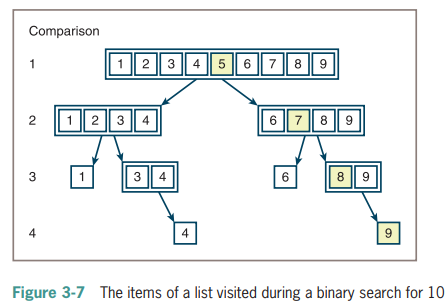

## **Сравнение элементов данных**

Как бинарный поиск, так и поиск минимума предполагают, что элементы в списке
сопоставимы друг с другом. В Python это означает, что элементы одного типа
и что они распознают операторы сравнения ==, < и >. Объекты нескольких встроенных
Типы Python, такие как числа, строки и списки, можно сравнивать с помощью этих операторов.

## **Основные алгоритмы сортировки**

Специалисты по информатике разработали множество оригинальных стратегий для сортировки списка элементов.
Некоторые из них рассматриваются здесь. Алгоритмы, рассмотренные в этом разделе, просты в
написании, но неэффективны; алгоритмы, обсуждаемые в следующем разделе, сложнее в написании, но
более эффективны. (Это распространенный компромисс.) Каждая из разработанных функций сортировки Python
работает со списком целых чисел и использует функцию swap для обмена позициями
двух элементов в списке. Вот код для этой функции:

In [ ]:
def swap(lyst, i, j):
    """Exchanges the items at positions i and j."""
    # You could say lyst[i], lyst[j] = lyst[j], lyst[i]
    # but the following code shows what is really going on
    temp = lyst[i]
    lyst[i] = lyst[j]
    lyst[j] = temp

## **Сортировка выбором**

Возможно, самая простая стратегия заключается в поиске по всему списку позиции самого маленького элемента.
Если эта позиция не совпадает с первой позицией, алгоритм меняет местами элементы в этих
позициях. Затем алгоритм возвращается ко второй позиции и повторяет этот процесс,
при необходимости заменяя наименьший элемент элементом, находящимся на второй позиции. Когда
алгоритм достигает последней позиции в общем процессе, список сортируется. Алгоритм
называется сортировкой по выбору, потому что при каждом прохождении через основной цикл выбирается один элемент, который будет
переехал. На рисунке 3-8 показаны состояния списка из пяти элементов после каждого этапа поиска и замены
при сортировке по выбору. Два элемента, которые только что поменялись местами при каждом проходе, помечены звездочками рядом с ними, а
отсортированная часть списка заштрихована.

Ниже представлен пример кода:

In [22]:
def selectionSort(alist):
    for i in range(0, len(alist) - 1):
        smallest = i
        for j in range(i + 1, len(alist)):
            if alist[j] < alist[smallest]:
                smallest = j
        alist[i], alist[smallest] = alist[smallest], alist[i]

In [26]:
arr = [4, 2, 1, 5, 3, 9, 0, 6, 8, 7]
selectionSort(arr)
print(arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## **Сортировка пузырьком**

Другой алгоритм сортировки, который относительно прост в понимании и кодировании, называется пузырьковой сортировкой.
Его стратегия заключается в том, чтобы начинать с начала списка и сравнивать пары элементов данных по мере продвижения
к концу. Каждый раз, когда элементы в паре расположены не по порядку, алгоритм меняет их местами.
Этот процесс приводит к перемещению самых крупных элементов в конец списка. Алгоритм затем повторяет процесс с начала списка и переходит к предпоследнему элементу
и так далее, пока не начнет с последнего элемента. На этом этапе список сортируется.

Ниже представлен пример кода:

In [27]:
def bubbleSort(list1):
    # Outer loop for traverse the entire list
    for i in range(0,len(list1)-1):
        for j in range(len(list1)-1):
            if(list1[j]>list1[j+1]):
                temp = list1[j]
                list1[j] = list1[j+1]
                list1[j+1] = temp
    return list1


In [30]:
list1 = [5, 3, 8, 6, 7, 2]
print("The unsorted list is: ", list1)
# Calling the bubble sort function
print("The sorted list is: ", bubbleSort(list1))


The unsorted list is:  [5, 3, 8, 6, 7, 2]
The sorted list is:  [2, 3, 5, 6, 7, 8]


## **Сортировка вставками**

Наша модифицированная пузырьковая сортировка работает лучше, чем сортировка по выбору, для списков, которые уже
отсортированы. Но наша модифицированная пузырьковая сортировка все равно может работать плохо, если многие элементы
в списке расположены не по порядку. Другой алгоритм, называемый сортировкой по вставке, пытается использовать частичный
порядок списка другим способом. Стратегия заключается в следующем:


*   При i-м прохождении по списку, где i колеблется от 1 до n 2 1, i-й элемент должен быть
вставлен на свое надлежащее место среди первых i элементов в списке.
*   После i-го прохода первые i элементов должны быть в отсортированном порядке.
*   Этот процесс аналогичен тому, как многие люди раскладывают игральные карты в
своих руках. То есть, если вы держите первые i 2 1 карты по порядку, вы выбираете i-ю карту и
сравниваете ее с этими картами, пока не найдете подходящее место.
*   Как и в случае с другими нашими алгоритмами сортировки, сортировка по вставке состоит из двух циклов. Внешний
цикл проходит позиции от 1 до n 2 1. Для каждой позиции i в этом цикле вы сохраняете
элемент и начинаете внутренний цикл с позиции i 2 1. Для каждой позиции j в этом цикле вы
перемещаете элемент в позицию j 1 1 до тех пор, пока не найдете точку вставки для сохраненного (i-го)
пункт.

In [31]:
# creating a function for insertion
def insertion_sort(list1):

        # Outer loop to traverse through 1 to len(list1)
        for i in range(1, len(list1)):

            value = list1[i]

            # Move elements of list1[0..i-1], that are
            # greater than value, to one position ahead
            # of their current position
            j = i - 1
            while j >= 0 and value < list1[j]:
                list1[j + 1] = list1[j]
                j -= 1
            list1[j + 1] = value
        return list1


## **Реализация быстрой сортировки**

Алгоритм быстрой сортировки наиболее легко кодируется с использованием рекурсивного подхода. Следующий
скрипт определяет функцию быстрой сортировки верхнего уровня для клиента, рекурсивную
функцию quicksortHelper для скрытия дополнительных аргументов для конечных точек подсписка и
функцию разбиения на разделы. Скрипт запускает быструю сортировку по списку из 20 случайно упорядоченных целых чисел.

In [36]:
def quickSort(A):
    if len(A) <= 1:
        return A
    else:
        q = random.choice(A)
        L = []
        M = []
        R = []
        for elem in A:
            if elem < q:
                L.append(elem)
            elif elem > q:
                R.append(elem)
            else:
                M.append(elem)
        return quickSort(L) + M + quickSort(R)

In [37]:
list1 = [5, 3, 8, 6, 7, 2]
print(f"The unsorted list is: {list1}")
# Calling the bubble sort function
print(f"The sorted list is: {quickSort(list1)}")

The unsorted list is: [5, 3, 8, 6, 7, 2]
The sorted list is: [2, 3, 5, 6, 7, 8]


## **Сортировка слиянием**

В процессе объединения используется массив того же размера, что и список. (В главе 4 подробно рассматриваются массивы
.) Этот массив называется буфером копирования. Чтобы избежать накладных расходов, связанных с выделением и
освобождением буфера копирования при каждом вызове merge, буфер выделяется один раз в
mergeSort и впоследствии передается в качестве аргумента mergeSortHelper и merge. Каждый
раз, когда вызывается mergeSortHelper, ему необходимо знать границы подсписка, с которым он
работает. Эти границы задаются двумя другими параметрами: low и high.

Наконец, вот код для функции слияния:

In [38]:
def merge(lyst, copyBuffer, low, middle, high):
    # lyst list that is being sorted
    # copyBuffer temp space needed during the merge process
    # low beginning of first sorted sublist
    # middle end of first sorted sublist
    # middle + 1 beginning of second sorted sublist
    # high end of second sorted sublist
    # Initialize i1 and i2 to the first items in each sublist
    i1 = low
    i2 = middle + 1
    # Interleave items from the sublists into the
    # copyBuffer in such a way that order is maintained.
    for i in range(low, high + 1):
        if i1 > middle:
            copyBuffer[i] = lyst[i2] # First sublist exhausted
            i2 += 1
        elif i2 > high:
            copyBuffer[i] = lyst[i1] # Second sublist exhausted
            i1 += 1
        elif lyst[i1] < lyst[i2]:
            copyBuffer[i] = lyst[i1] # Item in first sublist <
            i1 += 1
        else:
            copyBuffer[i] = lyst[i2] # Item in second sublist <
            i2 += 1
    for i in range (low, high + 1): # Copy sorted items back to
        lyst[i] = copyBuffer[i] # proper position in lyst


## **Экспоненциальный алгоритм: рекурсивный алгоритм Фибоначчи**

Ранее в этой главе вы запускали рекурсивную функцию Фибоначчи, чтобы получить количество
рекурсивных вызовов с различными размерами проблемы. Вы видели, что количество вызовов, казалось, росло
намного быстрее, чем квадрат размера проблемы. Вот код для функции
еще раз:

In [40]:
def fib(n):
    """The recursive Fibonacci function."""
    if n < 3:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)

Другой способ проиллюстрировать этот быстрый рост объема работы - отобразить дерево вызовов функции
для данного размера задачи. На рисунке 3-16 показаны вызовы, связанные с использованием рекурсивной
функции для вычисления шестого числа Фибоначчи. Чтобы сохранить диаграмму достаточно компактной,
вы пишете (6) вместо fib(6).

: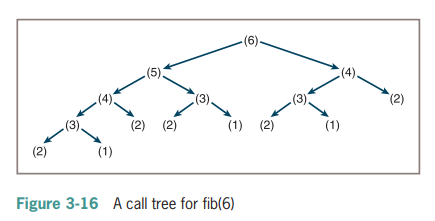

## **Преобразование Фибоначчи в линейный алгоритм**

Хотя рекурсивная функция Фибоначчи отражает простоту и элегантность
рекурсивного определения последовательности Фибоначчи, производительность этой функции
во время выполнения неприемлема. Другой алгоритм улучшает эту производительность на несколько
порядков и, фактически, сводит сложность к линейному времени. В этом разделе будет разработан
этот альтернативный алгоритм и оцениваете его производительность.

Напомним, что первые два числа в последовательности Фибоначчи равны 1s, и каждое число после
этого является суммой двух предыдущих чисел. Таким образом, новый алгоритм запускает цикл, если n является
по крайней мере третьим числом Фибоначчи. Это число будет, по крайней мере, суммой первых двух
(11 51 2). Цикл вычисляет эту сумму, а затем выполняет две замены: первое
число становится вторым, а второе становится только что вычисленной суммой.

Рассмотрим пример кода ниже:

In [43]:
def fib(n, counter):
    """Count the number of iterations in the Fibonacci
    function."""
    sum = 1
    first = 1
    second = 1
    count = 3
    while count <= n:
        counter.increment()
        sum = first + second
        first = second
        second = sum
        count += 1
    return sum